# Overview

For every traffic violation and police stop in San Diego, the police officer records all the drivers information and the outcome of the stop. Looking at this data we want to see if the identity of the driver had any influence in the severity of the resulting charge. Looking at the location, time of day, race and age of these individuals we can get a deeper understanding of any discriminatory trends in police writeups.  

# Names

Melvin Wijaya, Alex Monji, Evo Pavosevich, Ryan Chen

# Group Member IDs

A14213651, A12922825, A13840435, A12785356

# Research Question

We wish to answer the question "how does race and age of a person relate to their outcome (action the police officer takes) of a police traffic stop in San Diego?" To supplement our analysis, we also wish to interpret how the time of day and the service area (district within San Diego) that the traffic stop took place in affects the outcome.

# Background and Prior Work

Cross country studies on traffic stops tend to indicate that race plays a role in the result of a traffic stop, whether a stop results in a search or arrest, and the likelihood of being stopped by police. However, we must recognize that San Diego is not representative of the entire country and we cannot or should not make any assumptions. 

Upon further research, the study “Traffic Enforcement in San Diego, California” (https://www.sandiego.gov/sites/default/files/sdpdvehiclestopsfinal.pdf) conducted by San Diego State University researchers on SDPD vehicle stops in 2014 and 2015 found the following (not all points in the executive summary included for brevity):

- Citywide, disparities between Black and White drivers were evident in vehicle stop data from 2014, but not 2015. No such disparities found between Whites and either Hispanic of Asian/Pacisic Island drivers in 2014 or 2015.
- Citywide and across 2014 and 2015, Black and Hispanic drivers were more likely than White drivers to be searched following a traffic stop, yet were less likely to be found possessing contraband.
- Black, Hispanic, and Asian/Pacisic Island drivers were subject to field interviews at greater rates than White drivers.
- Their was no meaningful difference in the rate of which drivers from each racial/ethnic group were arrested.
- Black drivers were less likely to receive a citation than White drivers stopped under similar circumstances.

To comment on the finding of racial disparities in the 2014 dataset, on page 35 of the study, it reports that “Black drivers were nearly 20 percent more likely to be the subject of a discretionary traffic stop than were White drivers. When confined to drivers age 25 and under, young Black drivers in 2014 were 43.8 percent more likely to be stopped in daylight than after dark, compared to young Whites.”

According to the study, it seems that age, when combined with race, has an affect on the likelihood of a stop. As far as race goes, the study makes an analysis on racial disparity of post-stop outcomes (summarized on page 66-67), finding that Black and Hispanic drivers were more likely to be searched, but there is no statistical difference in arrest rates between Black and White drivers, while Hispanic drivers were arrested at slightly higher rates, and Asian/Pacisic Island drivers had the lowest arrest rate. 

What does this mean for us? Our group is examining the Oct 2017 - Jun 2018 data set for SDPD vehicle stops. It seems that the study found racial disparities in 2014, but not for the data from 2015. We would like to examine whether more recent traffic stop data from 2017-2018 shows results more similar to 2014 or to 2015 and if we can see still the trends that they saw in race and age in the outcome of a stop.

# Hypothesis

We hypothesize that race will play a factor in determining the outcome severity of a traffic stop with non-white individuals more statistically likely to receive harsher outcomes due to racial profiling or bias. We also predict that there is a correlation between age in determining the outcome of a traffic stop. Specifically, we expect that younger and older drivers are more likely to receive warnings but those in between are more likely to receive a citation or more severe punishment.

Racial profiling is a serious issue in larger cities and security in transportation networks, with a lot of examples in airports and police brutality in the news. With the data we were able to obtain about San Diego vehicle stops, we wanted to see if the trend of bias outcomes existed here as well. 


# Dataset

We will be sourcing our data from here: https://data.sandiego.gov/datasets/police-vehicle-stops/. Specifically, we will be using the “Vehicle Stops (Oct 2017 - June 2018, new format)” dataset. The dataset contains 34,334 records with each record containing a unique id, the stop cause, service area, race, sex, age, time, if the driver was a San Diego resident, if the driver was arrested, if the driver was searched and if they were searched whether consent was given and whether property was seized, and the action that was taken.

The data set is tabular, CSV, and each observation is in its own row. We do have all of the variables necessary to answer our question, however some data points, especially for the variables obtained_consent, contraband_found, property_seized, search_type, and search_basis are missing. This information could have been used to make a richer analysis, but should not be necessary to answer our question. The data exists in a single table; if necessary, we might be able to combine data sets, but there are enough observations and variables that this should not be an issue.

We also compared the data to existing maps that show San Diego racial demographics and service areas.

Service area map - https://www.sandiego.gov/sites/default/files/pd-citywide-map.pdf

Racial mapping - https://upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Race_and_ethnicity_2010-_San_Diego_%285560483270%29.png/1920px-Race_and_ethnicity_2010-_San_Diego_%285560483270%29.png

# Setup

Here we're importing all of the libraries we will need to handle, visualize, and analyze the data.

In [113]:
# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 15
pd.options.display.max_columns = 16

#Displaying images
from PIL import Image, ImageDraw
from IPython.display import display, Image

# statistics libraries
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest, chi2, chi2_contingency

# Data Cleaning

This is the unmodified data set, you can see that some of the columns are populated with NaN/missing data.

In [114]:
df = pd.read_csv('vehicle_stops_final_datasd.csv')
print("Initial shape of data: ", df.shape)
print(df) # print out data set to take a first look

Initial shape of data:  (34333, 16)
       stop_id           stop_cause service_area subject_race subject_sex  \
0        69583  Equipment Violation          110            H           M   
1        69584     Moving Violation          430            H           M   
2        69598     Moving Violation          430            H           M   
3        70341  Equipment Violation          110            A           M   
4        70365           Radio Call          620            O           U   
5        70428  Equipment Violation          430            H           M   
6        70718     Moving Violation          620            A           F   
...        ...                  ...          ...          ...         ...   
34326  5009957     Moving Violation          310            C           M   
34327  5010486     Moving Violation          310            V           M   
34328  5011798     Moving Violation          710            B           F   
34329  5011817     Moving Violation     

We'll drop some of the columns we will not be using in our analysis.

In [115]:
#drop columns we aren't interested in

df = df.drop(['obtained_consent', 'contraband_found', 'property_seized', 
              'search_type', 'search_basis', 'stop_id', 'sd_resident'], axis=1)
df.head();

Upon further inspection, we notice that many rows are simply NaN except for the timestamp, age, and service area

In [116]:
df[df.isnull().any(axis=1)].head()

stop_cause service_area subject_race subject_sex  subject_age  \
7         NaN      Unknown          NaN         NaN            0   
20        NaN      Unknown          NaN         NaN            0   
46        NaN      Unknown          NaN         NaN            0   
51        NaN      Unknown          NaN         NaN            0   
60        NaN      Unknown          NaN         NaN            0   

              timestamp arrested searched action  
7   2017-10-17 08:19:19      NaN      NaN    NaN  
20  2017-10-17 09:13:53      NaN      NaN    NaN  
46  2017-10-17 12:21:26      NaN      NaN    NaN  
51  2017-10-17 13:03:35      NaN      NaN    NaN  
60  2017-10-17 15:15:55      NaN      NaN    NaN

In [117]:
temp_df = df.drop(['subject_age','timestamp','service_area'],axis=1)
all_nan = temp_df[temp_df.isnull().all(axis=1)].index
temp_df.iloc[all_nan]

stop_cause subject_race subject_sex arrested searched action
7          NaN          NaN         NaN      NaN      NaN    NaN
20         NaN          NaN         NaN      NaN      NaN    NaN
46         NaN          NaN         NaN      NaN      NaN    NaN
51         NaN          NaN         NaN      NaN      NaN    NaN
60         NaN          NaN         NaN      NaN      NaN    NaN
116        NaN          NaN         NaN      NaN      NaN    NaN
120        NaN          NaN         NaN      NaN      NaN    NaN

The above rows are all NaN so we can safely remove them

In [118]:
temp_df = temp_df.drop(all_nan) # drop all rows with missing values
print(temp_df[temp_df.isnull().all(axis=1)].index ) # Double check that all of them are gone

Int64Index([], dtype='int64')


In [119]:
df = df.drop(all_nan) # Now do the same to our actual dataframe

There are still a couple of NaNs in our data

In [120]:
df[df.isnull().any(1)]

stop_cause service_area subject_race subject_sex  subject_age  \
2015      Moving Violation          310            H           F           30   
8772   Equipment Violation          440            H           M           28   
10135  Equipment Violation          610            W           M           45   
10677  Equipment Violation          440            O           U            0   
22691     Moving Violation          430            O           M           22   
24679  Equipment Violation          310            O           U           99   
25176  Equipment Violation          820            B           M           53   

                 timestamp arrested searched action  
2015   2017-10-31 20:45:20        N        N    NaN  
8772   2017-12-12 22:59:46        N        N    NaN  
10135  2017-12-22 19:03:10        N        N    NaN  
10677  2017-12-27 08:59:56        N        N    NaN  
22691  2018-03-22 20:27:52        N        N    NaN  
24679  2018-04-06 20:36:26        N        N    NaN  
25176  2018-04-11 07:44:06        N        N    NaN

Since they all occur in the action column we can assume that it means that no action was taken, so we can go through the action column and replace all NaN with 'no action'

In [121]:
for index, row in df[df.isnull().any(1)].iterrows():
    df.at[index,'action'] = 'no action'

In [122]:
df[df.isnull().any(1)]

Empty DataFrame
Columns: [stop_cause, service_area, subject_race, subject_sex, subject_age, timestamp, arrested, searched, action]
Index: []

In [123]:
print(len(df['action'].unique())) # there's a lot of unique actions :(

636


We change all the strings to be lower case and strip leading and trailing whitespace to make pattern matching easier

In [124]:
df['action'] = df['action'].apply(lambda x: x.lower().strip())

In [125]:
# Function returns all unique strings in the array that contain the given keyword
# Note that all strings in the array are split by commas, then each of those individual
# strings are searched for the keyword
def get_unique_occur(arr, keyword):
    temp_arr = []
    for items in arr:
        items = items.split(',')
        for item in items:
            if keyword in item:
                temp_arr.append(item)
    return list(set(temp_arr))

In [126]:
# Given an array, a keyword, and some filters
# For each item in the actions array, split the string by comma
# If the string can be found in the filters array, the changed the string to be the keyword
def convert_to_keyword(actions, keyword, filters):
    actions = actions.split(',')
    for i in range(len(actions)):
        if actions[i] in filters:
            actions[i] = keyword
    return ','.join(actions)

Here we look for all the unique occurrences of the word 'arrest' in the actions column

In [127]:
arrests = set([x for x in df['action'] if 'arr' in x])
unique_arrests = get_unique_occur(arrests, 'arr')
print(unique_arrests)

[' cc ref late cross at red arrow', 'arrested for 979 pc', 'arrest passenger', ' arrested', 'arrested', 'cite and arrest', 'arrest 11378 hs', '10851 arrest', 'narco arrest', 'arrested for warrant', '10-16 for warrant', 'felony arrest', 'advised of red arrow at the intersection', 'warrant', 'arrest report', 'warrent arrest', 'arrest for warrants', 'felony arrest(evading)', 'driver arrested', 'arrest 23152', ' arrest of passenger', 'felony evading arrest', 'arrest / veh impound', 'arrest - dui', 'passenger arrested', 'arrest. released to us marshals', ' passenger arrest', ' pass arrested', '(2) felony arrests', 'warrant arrest', 'female occupant arrested', ' passenger arrested', 'arrested dui', 'arrest dui', 'arrest', ' arrest 23152', 'arrest by sdso', 'dui arrest', 'owner arrived on scene and took vehicle', ' arrest', 'misdemeanor arrest', 'no bail warrant', 'arresr']


'cite and arrest' and 'arrest / veh impound' are both two separate actions so we'll separate them with a comma before moving ahead

In [128]:
# checking to see if they are substrings
for index, row in df.iterrows():
    if 'cite and arrest' in row['action']:
        print(row['action'])
    if 'arrest / veh impound' in row['action']:
        print(row['action'])

arrest / veh impound
cite and arrest


They aren't substrings so we can look for exact match and replace

In [129]:
df.at[df[df['action']=='arrest / veh impound'].index, 'action'] = 'arrest,veh impound'
df.at[df[df['action']=='cite and arrest'].index, 'action'] = 'cite,arrest'

In [130]:
arrests = set([x for x in df['action'] if 'arr' in x])
unique_arrests = get_unique_occur(arrests, 'arr')
print(unique_arrests)
print('arrest / veh impound' in unique_arrests or 'cite and arrest' in unique_arrests)

[' cc ref late cross at red arrow', 'arrested for 979 pc', 'arrest passenger', ' arrested', 'arrested', 'arrest 11378 hs', '10851 arrest', 'narco arrest', 'arrested for warrant', '10-16 for warrant', 'felony arrest', 'advised of red arrow at the intersection', 'warrant', 'arrest report', 'warrent arrest', 'arrest for warrants', 'felony arrest(evading)', 'driver arrested', 'arrest 23152', ' arrest of passenger', 'felony evading arrest', 'arrest - dui', 'passenger arrested', 'arrest. released to us marshals', ' passenger arrest', ' pass arrested', '(2) felony arrests', 'warrant arrest', 'female occupant arrested', ' passenger arrested', 'arrested dui', 'arrest dui', 'arrest', ' arrest 23152', 'arrest by sdso', 'dui arrest', 'owner arrived on scene and took vehicle', ' arrest', 'misdemeanor arrest', 'no bail warrant', 'arresr']
False


Remove the entries not related to the driver being arrested

In [131]:
entries_to_remove = [
    ' passenger arrested','advised of red arrow at the intersection','no bail warrant',
    ' passenger arrest',' pass arrested','passenger arrested',' arrest of passenger',
    '10-16 for warrant','owner arrived on scene and took vehicle',' cc ref late cross at red arrow',
    'arrest passenger'
]
for x in entries_to_remove:
    unique_arrests.remove(x)

Now we can go through all rows in the action column, and when we see a substring that looks like an item in the array above, we can replace it with 'arrest'

In [132]:
df['action'] = df['action'].apply(lambda x: convert_to_keyword(x, 'arrest', unique_arrests))

Here we look for all unique occurrences of the word 'verbal' in the actions column

In [133]:
verbal_warning = set([x for x in df['action'] if 'verbal' in x])
uniq_verbal_warnings = get_unique_occur(verbal_warning, 'verbal')
print(uniq_verbal_warnings)

['verbal', 'verbal notice for license', 'verbal warning', ' verbal', 'verbal as already cited for equip violation', ' verbal warning', 'verbal service given', 'verbal notice', 'verbal notice d/l susp']


All the returned results look applicable to 'verbal warning' so now we can go through all the rows in the action column, and when we see a substring that looks like an item in the array above, we can replace it with 'verbal warning'

In [134]:
df['action'] = df['action'].apply(lambda x: convert_to_keyword(x, 'verbal warning', uniq_verbal_warnings))

Here we look for all unique occurrences of the word 'written' in the actions column

In [135]:
written_warning = set([x for x in df['action'] if 'written' in x])
uniq_written_warnings = get_unique_occur(written_warning, 'written')
print(uniq_written_warnings)

['written service', ' written warning', 'written warning']


All the returned results look applicable to 'written warning' so now we can go through all the rows in the action column, and when we see a substring that looks like an item in the array above, we can replace it with 'written warning'

In [136]:
df['action'] = df['action'].apply(lambda x: convert_to_keyword(x, 'written warning', uniq_written_warnings))

Here we look for all unique occurrences of the word 'no violation' in the actions column

In [137]:
uniq_no_vio = list(set([x for x in df['action'] if 'no violation' in x]))
print(uniq_no_vio)

['no violation after investigation', 'no violation', 'no violation, exempt from 23123a', 'dmv did not update system, no violation.', 'no violation, see notes']


All the returned results look applicable to 'no violation' so now we can go through all the rows in the action column, and when we see a substring that looks like an item in the array above, we can replace it with 'no violation'

In [138]:
df['action'] = df['action'].apply(lambda x: 'no violation' if x in uniq_no_vio else x)

Here we look for all unique occurrences of the word 'no citation' or phrases of similar meaning in the actions column

In [139]:
no_cit = list(set([x for x in df['action'] 
                   if 'no citation' in x or 'no cite' in x or 'cannot cite' in x or 'already cited' in x]))
uniq_no_cit = get_unique_occur(no_cit, 'no citation')
uniq_no_cit.extend(get_unique_occur(no_cit, 'no cite'))
uniq_no_cit.extend(get_unique_occur(no_cit, 'cannot cite'))
uniq_no_cit.extend(get_unique_occur(no_cit, 'already cited'))
print(uniq_no_cit)

['no citation', ' driver not registered owner. no cite', 'driver was lost no cite', 'legally parked vehicle/no cite', ' cannot cite due to private lot', 'already cited']


All the returned results look applicable to 'no citation' so now we can go through all the rows in the action column, and when we see a substring that looks like an item in the array above, we can replace it with 'no citation'

In [140]:
df['action'] = df['action'].apply(lambda x: convert_to_keyword(x, 'no citation', uniq_no_cit))

Here we look for all unique occurrences of the word 'tow' in the actions column

In [141]:
tows = list(set([x for x in df['action'] if 'tow' in x]))
uniq_tows = get_unique_occur(tows, 'tow')
print(uniq_tows)

['towed vehicle', 'towed', 'vehicle tow', ' tow', ' veh tow', ' and tow', 'veh tow', 'tow', ' towed veh', ' tow for susp dl', 'towed car', ' towed car', 'tow impound']


In the returned results, we notice that one of the entries is 'tow impound', but 'tow' and 'impound' convey different meanings, so we separate the 2 words with a comma

In [142]:
df.at[df[df['action']=='tow impound']['action'].index, 'action'] = 'tow,impound'

Now we can check that the entry 'tow impound' no longer exists

In [143]:
tows = list(set([x for x in df['action'] if 'tow' in x]))
uniq_tows = get_unique_occur(tows, 'tow')
print(uniq_tows)

['towed vehicle', 'towed', 'vehicle tow', ' tow', ' veh tow', ' and tow', 'veh tow', 'tow', ' towed veh', ' tow for susp dl', 'towed car', ' towed car']


All the above phrases are related to 'tow' so whenever we see one of the above phrases, we can change it to just say 'tow'

In [144]:
df['action'] = df['action'].apply(lambda x: convert_to_keyword(x, 'tow', uniq_tows))

Here we look for all unique occurrences of the word 'impound'

In [145]:
impounds = list(set([x for x in df['action'] if 'impound' in x]))
uniq_impounds = get_unique_occur(impounds, 'impound')
print(uniq_impounds)

['vehicle impounded', 'impound vehicle', ' impounded', ' impound of veh and mct', 'veh impound', 'vehicle impound', 'impound', ' impounded veh', 'impounded vehicle', ' impound', ' veh impound', ' vehicle impound', ' vehicle impounded', ' impound 22651 (o)(1)(a) cvc']


All the above phrases are related to 'impound' so when we see one of the above phrases in the action column, change it to just 'impound'

In [146]:
df['action'] = df['action'].apply(lambda x: convert_to_keyword(x, 'impound', uniq_impounds))

Look for all unique occurrences of the word 'error' or phrases of similar meaning

In [147]:
error_keywords = ['accident', 'test', 'mistake', 'error', 'accidntl','accidental', 'no stop', 'did not make a stop']
errors = list(set([x for x in df['action'] for y in error_keywords if y in x]))
uniq_errors = []
for error in error_keywords:
    uniq_errors.extend(get_unique_occur(errors, error))
print(uniq_errors)

['accidental stop tag on car', 'created accidentally', 'accidental button', 'nothing/accidential', 'accidentall', 'accidental activation', 'accidently', 'accidental', ' test not real stop', 'testing', 'test test test', 'dmv re-test', 'test', 'mistake', 'dmv error-no enforce', 'button pushed in error', 'in error', 'this was in error', 'no stop. inc created in error', 'error', ' accidntl', 'accidental stop tag on car', 'accidental button', 'accidentall', 'accidental activation', 'created accidentally', 'accidental', 'no stop made', 'no stop', 'no stop. inc created in error', ' none  no stop', ' no stop', 'none... i did not make a stop']


All the above phrases are related to 'error'

In [148]:
df['action'] = df['action'].apply(lambda x: convert_to_keyword(x, 'error', uniq_errors))

Now we do the same with 'citations'

In [149]:
citations = list(set([x for x in df['action'] if 'citation' in x or 'cite' in x]))
uniq_citations = get_unique_occur(citations, 'citation')
uniq_citations.extend(get_unique_occur(citations, 'cite'))
print(uniq_citations)

[' misdemeanor citation', 'citation', 'no citation', 'misdemeanor citation', ' relesed with citation', 'mcite', 'misd cite and release', ' cite and release', ' passenger 4th search/ misd cite', 'misd cite', 'cite', ' m cite', ' cite to r/o', ' 2 mis cites', ' misd cite', ' cite', 'm-cite', ' m-cite', ' misdemeanor cite', 'parking cite', 'pcite', ' r/o cite. driver fi', ' has a cite from pre off', 'cite per 22 cvc', ' cite to r/o per 22 cvc', 'cite sign off']


'No citation' is different from 'citation' so we remove it from the list

In [150]:
uniq_citations.remove('no citation')

In [151]:
df['action'] = df['action'].apply(lambda x: convert_to_keyword(x, 'citation', uniq_citations))

Now we do the same for 'violation'

In [152]:
violations = list(set([x for x in df['action'] if 'violation' in x]))
uniq_violations = get_unique_occur(violations, 'violation')
print(uniq_violations)

['no violation', 'curfew violation', ' notice of violation', 'tro violation', 'notice of violation']


'No violation' is different from 'violation' so we remove it from the list

In [153]:
uniq_violations.remove('no violation')

In [154]:
df['action'] = df['action'].apply(lambda x: convert_to_keyword(x, 'violation', uniq_violations))

Do the same for suspensions

In [155]:
suspensions = list(set([x for x in df['action'] if 'sus' in x]))
uniq_suspension = get_unique_occur(suspensions, 'suspension')
uniq_suspension.extend(get_unique_occur(suspensions, 's'))
print(uniq_suspension)

['service suspension', ' served suspension', 'notice of suspension', 'service of suspension', ' served suspension as well', 'suspension service', 'served notice of sus lic', '207 call her plate was listed as suspects car', 'dl susp served', 'service suspension', ' served suspension', 'notice of suspension', 'service suspemsion', 'suspension service', 'service of suspension', 'did not match suspect', ' served suspension as well', 'reasonable suspicion', ' dl susp. service', 'wrong suspect vehicle', '116 susp']


Some entries are related to suspect/suspicions and not suspensions so we remove those

In [156]:
uniq_suspension.remove('116 susp')
uniq_suspension.remove('wrong suspect vehicle')
uniq_suspension.remove('207 call her plate was listed as suspects car')
uniq_suspension.remove('reasonable suspicion')
uniq_suspension.remove('did not match suspect')

In [157]:
df['action'] = df['action'].apply(lambda x: convert_to_keyword(x, 'suspension', uniq_suspension))

Do the same for warnings

In [158]:
warnings = list(set([x for x in df['action'] if 'warning' in x]))
uniq_warnings = get_unique_occur(warnings, 'warning')
print(uniq_warnings)

['traffic warning ticket', 'verbal warning', ' warning', ' traffic warning', 'traffic warning', 'written warning', '72hour warning']


We want 'warnings' to just be for misc. warnings not verbal/written ones so we remove those from the list

In [159]:
uniq_warnings.remove('verbal warning')
uniq_warnings.remove('written warning')

In [160]:
df['action'] = df['action'].apply(lambda x: convert_to_keyword(x, 'misc. warning', uniq_warnings))

Do the same for interview

In [161]:
interviews = list(set([x for x in df['action'] if 'interview' in x]))
uniq_interviews = get_unique_occur(interviews, 'interview')
print(uniq_interviews)

['field interview', ' field interview']


In [162]:
df['action'] = df['action'].apply(lambda x: convert_to_keyword(x, 'field interview', uniq_interviews))

Do the same for no action

In [163]:
no_actions = list(set([x for x in df['action'] \
                       if 'none' in x or 'nothing' in x or 'na' in x or 'n/a' in x or 'no action' in x]))
uniq_no_actions = get_unique_occur(no_actions, 'none')
uniq_no_actions.extend(get_unique_occur(no_actions, 'nothing'))
uniq_no_actions.extend(get_unique_occur(no_actions, 'na'))
uniq_no_actions.extend(get_unique_occur(no_actions, 'n/a'))
uniq_no_actions.extend(get_unique_occur(no_actions, 'no action'))
print(uniq_no_actions)

[' none', 'none', 'nothing', ' na', 'reasonable suspicion', 'na', ' narc and no cdl', ' n/a', 'no action', 'no action taken']


Remove the keywords that are not applicable here

In [164]:
uniq_no_actions.remove('reasonable suspicion')
uniq_no_actions.remove(' narc and no cdl')

In [165]:
df['action'] = df['action'].apply(lambda x: convert_to_keyword(x, 'no action', uniq_no_actions))

In [166]:
action_categories = [
    'citation', 
    'no citation',
    'violation', 
    'no violation',
    'suspension',
    'verbal warning', 
    'written warning',
    'misc. warning', 
    'impound', 
    'tow', 
    'field interview',
    'no action'
]

Create a new column for each type of action taken

In [167]:
for action in action_categories:
    df[action] = 0

Go through every row and look at the action(s). Mark a 1 in the respective column

In [168]:
for index, row in df.iterrows():
    action = row['action']
    action = action.split(',')
    i = 0
    while i < len(action):
        if action[i] in action_categories:
            df.at[index, action[i]] = 1
            action.remove(action[i])
            i -= 1
        i += 1
    action = ','.join(action)
    df.at[index, 'action'] = action

'arrest' action was given so we don't need it anymore

In [169]:
df['action'] = df['action'].apply(lambda x: '' if x == 'arrest' else x)

We can drop the rows that were made in error by the police officer

In [170]:
df = df[~df['action'].str.contains('error')]

Now all the action entries left are ones that we don't have a suitable category for. Mark them as 'other' category

In [171]:
df['other'] = 0

In [172]:
for index, row in df[df['action'] != ''].iterrows():
    df.at[index, 'other'] = 1
    df.at[index, 'action'] = ''

We separated all the actions into separate columns so we no longer need the 'action' column so we drop it

In [173]:
df.drop(['action'], axis=1, inplace=True)

To be more consistent, change 'arrested' and 'searched' columns to be 1 and 0 instead of 'Y' and 'N'

In [174]:
df['arrested'] = df['arrested'].apply(lambda x: 1 if x == 'Y' else 0)
df['searched'] = df['searched'].apply(lambda x: 1 if x == 'Y' else 0)

The indices of the dataframe are a bit messed up after dropping rows, so now we'll reset the indices

In [175]:
df.index[0:10]

Int64Index([0, 1, 2, 3, 5, 6, 8, 9, 10, 11], dtype='int64')

In [176]:
df.reset_index(drop=True, inplace=True)

In our analysis, we want to consider 'Asians' and 'Other Asians' as one group

In [177]:
df['subject_race'].unique()

array(['H', 'A', 'W', 'O', 'B', 'D', 'I', 'S', 'U', 'P', 'F', 'V', 'L',
       'J', 'C', 'Z', 'G', 'K'], dtype=object)

In [178]:
def group_asians(race):
    if race not in ['W', 'H', 'B', 'O']:
        return 'A'
    return race

df['subject_race'] = df['subject_race'].apply(group_asians)

In [179]:
df['subject_race'].unique()

array(['H', 'A', 'W', 'O', 'B'], dtype=object)

There appears to be quite a few entries where the age is 0 due to error by the police officer

In [180]:
print(df[df['subject_age']==0].shape)

(212, 21)


In [181]:
df = df[df['subject_age']!=0]

# Data Analysis and Results

Below is the clean data set for each traffic violation and the details about each stop. We were able to include the service area, subject's race, sex, age, the time and the outcome of the stop. After removing stops with insufficient information our data set consists of about 34,000 stops. We then split the Data up into four categories to get an understanding of how Race, Age, Time of Day, and Service area affected the outcome of these traffic violations 

In [182]:
all_actions = action_categories + ['arrested']
df.head(30)

stop_cause service_area subject_race subject_sex  subject_age  \
0   Equipment Violation          110            H           M           50   
1      Moving Violation          430            H           M           33   
2      Moving Violation          430            H           M           33   
3   Equipment Violation          110            A           M           25   
4   Equipment Violation          430            H           M           30   
5      Moving Violation          620            A           F           55   
6      Moving Violation          930            A           M           34   
..                  ...          ...          ...         ...          ...   
23       Code Violation          610            O           F           20   
24  Equipment Violation          110            H           F           56   
25     Moving Violation          620            W           M           57   
26     Moving Violation          620            W           M           57   
27     Moving Violation          520            W           F           18   
28  Equipment Violation          120            W           M           27   
29     Moving Violation          510            H           M           40   

              timestamp  arrested  searched  ...    verbal warning  \
0   2017-10-17 05:14:14         0         0  ...                 1   
1   2017-10-17 05:15:43         0         0  ...                 0   
2   2017-10-17 05:17:22         0         0  ...                 0   
3   2017-10-17 07:21:28         0         0  ...                 0   
4   2017-10-17 07:33:28         0         0  ...                 1   
5   2017-10-17 07:59:03         0         0  ...                 0   
6   2017-10-17 08:25:21         0         0  ...                 1   
..                  ...       ...       ...  ...               ...   
23  2017-10-17 09:53:07         0         0  ...                 0   
24  2017-10-17 09:56:59         0         0  ...                 0   
25  2017-10-17 10:20:50         0         0  ...                 1   
26  2017-10-17 10:21:57         0         0  ...                 1   
27  2017-10-17 10:33:51         0         0  ...                 0   
28  2017-10-17 10:35:19         0         0  ...                 0   
29  2017-10-17 10:45:06         0         0  ...                 1   

    written warning  misc. warning  impound  tow  field interview  no action  \
0                 0              0        0    0                0          0   
1                 0              0        0    0                0          0   
2                 0              0        0    0                0          0   
3                 0              0        0    0                1          0   
4                 0              0        0    0                0          0   
5                 0              0        0    0                0          0   
6                 0              0        0    0                0          0   
..              ...            ...      ...  ...              ...        ...   
23                0              0        0    0                0          0   
24                0              0        0    0                1          0   
25                0              0        0    0                0          0   
26                0              0        0    0                0          0   
27                0              0        0    0                0          0   
28                0              0        0    0                0          0   
29                0              0        0    0                0          0   

    other  
0       0  
1       0  
2       0  
3       0  
4       0  
5       0  
6       0  
..    ...  
23      0  
24      0  
25      0  
26      0  
27      0  
28      0  
29      0  

[30 rows x 21 columns]

<strong>Below is a table for our desciptive analysis, all of our data at a glance.</strong><br>
The characteristics of age, sex, and race are all described in relation to each action taken by the police. Note that subject sex isn't used, but is included for completeness.

In [183]:
#Descriptive table
# Sort Actions taken
sums = {x:df[x].sum() for x in all_actions}
sums['other'] = df['other'].sum()
sorted_sums = [(x, sums[x]) for x in sorted(sums, key=sums.get, reverse=True)]
sorted_sums

import functools # for reducing
sorted_actions = [x[0] for x in sorted_sums] # sorted actions by total number of instances for visualization purposes
descriptive_summary = pd.DataFrame(columns=(["Characteristic"]+["total"]+sorted_actions));
pd.options.display.max_rows = 40;
descriptive_summary.set_index("Characteristic");
total_samples = [sums[category] for category in sorted_actions];
#total number of samples
descriptive_summary.loc[0] = ["n"]+[functools.reduce(lambda a,b : a+b,total_samples)]+\
[str(sums[category]) for category in sorted_actions];
#age, loop unrolled for logical simplicity
descriptive_summary.loc[1] = ["[Age]"]+["=====" for x in range(0, len(sorted_actions)+1)]
descriptive_summary.loc[2] = ["10-19 yr"]+[sum((df['subject_age']>=10) & (df['subject_age']<=19))]+\
[sum((df['subject_age']>=10) & (df['subject_age']<=19) & (df[category]==1)) for category in sorted_actions];
descriptive_summary.loc[3] = ["20-29 yr"]+[sum((df['subject_age']>=20) & (df['subject_age']<=29))]+\
[sum((df['subject_age']>=20) & (df['subject_age']<=29) & (df[category]==1)) for category in sorted_actions];
descriptive_summary.loc[4] = ["30-39 yr"]+[sum((df['subject_age']>=30) & (df['subject_age']<=39))]+\
[sum((df['subject_age']>=30) & (df['subject_age']<=39) & (df[category]==1)) for category in sorted_actions];
descriptive_summary.loc[5] = ["40-49 yr"]+[sum((df['subject_age']>=40) & (df['subject_age']<=49))]+\
[sum((df['subject_age']>=40) & (df['subject_age']<=49) & (df[category]==1)) for category in sorted_actions];
descriptive_summary.loc[6] = ["50-59 yr"]+[sum((df['subject_age']>=50) & (df['subject_age']<=59))]+\
[sum((df['subject_age']>=50) & (df['subject_age']<=59) & (df[category]==1)) for category in sorted_actions];
descriptive_summary.loc[7] = ["60-69 yr"]+[sum((df['subject_age']>=60) & (df['subject_age']<=69))]+\
[sum((df['subject_age']>=60) & (df['subject_age']<=69) & (df[category]==1)) for category in sorted_actions];
descriptive_summary.loc[8] = ["70-79 yr"]+[sum((df['subject_age']>=70) & (df['subject_age']<=79))]+\
[sum((df['subject_age']>=70) & (df['subject_age']<=79) & (df[category]==1)) for category in sorted_actions];
descriptive_summary.loc[9] = ["80-89 yr"]+[sum((df['subject_age']>=80) & (df['subject_age']<=89))]+\
[sum((df['subject_age']>=80) & (df['subject_age']<=89) & (df[category]==1)) for category in sorted_actions];
descriptive_summary.loc[10] = ["≥90yr"]+[sum(df['subject_age']>=90)]+\
[sum((df['subject_age']>=90) & (df[category]==1)) for category in sorted_actions];
descriptive_summary.loc[11] = ["Mean"]+[round(df["subject_age"].mean(),1)]+\
[round(df.groupby(category).mean().loc[1,'subject_age'],1) for category in sorted_actions];
descriptive_summary.loc[12] = ["Std Dev"]+[round(df["subject_age"].std(),1)]+\
[round(df.groupby(category).std().loc[1,'subject_age'],1) for category in sorted_actions];
#sex, loop unrolled for logical simplicity
descriptive_summary.loc[13] = ["[Sex]"]+["=====" for x in range(0, len(sorted_actions)+1)]
descriptive_summary.loc[14] = ["Male"]+[sum(df['subject_sex']=="M")]+\
[sum((df['subject_sex']=="M") & (df[category]==1)) for category in sorted_actions];
descriptive_summary.loc[15] = ["Female"]+[sum(df['subject_sex']=="F")]+\
[sum((df['subject_sex']=="F") & (df[category]==1)) for category in sorted_actions];
#race
descriptive_summary.loc[16] = ["[Race]"]+["=====" for x in range(0, len(sorted_actions)+1)]
race_map={
    "White": "W",
    "Hispanic": "H",
    "Black": "B",
    "Other": "O",
    "Asian": "A"
}
index = 17;
for key, value in race_map.items():
    descriptive_summary.loc[index] = [key]+[sum(df['subject_race']==value)]+\
        [sum((df['subject_race']==value) & (df[category]==1)) for category in sorted_actions];
    index += 1
descriptive_summary.head(35)

Characteristic  total verbal warning citation field interview  \
0               n  35410          15065    14284            2475   
1           [Age]  =====          =====    =====           =====   
2        10-19 yr   1723            700      774             129   
3        20-29 yr  11464           5057     4812             904   
4        30-39 yr   8096           3584     3397             614   
5        40-49 yr   5725           2542     2365             405   
6        50-59 yr   4372           1934     1830             286   
7        60-69 yr   2025            909      852             118   
8        70-79 yr    502            240      199              16   
9        80-89 yr    137             81       44               2   
10          ≥90yr     29             15        7               1   
11           Mean   36.6           36.7     36.6            35.2   
12        Std Dev     14           14.1       14            12.8   
13          [Sex]  =====          =====    =====           =====   
14           Male  24131          10855     9655            2139   
15         Female   9933           4206     4625             336   
16         [Race]  =====          =====    =====           =====   
17          White  11770           5023     5173             580   
18       Hispanic  10886           4825     4639             959   
19          Black   5417           2719     1694             708   
20          Other   2251            868     1154              76   
21          Asian   3756           1630     1624             152   

   written warning arrested  other impound misc. warning    tow no action  \
0             1582     1180    565      74            57     49        38   
1            =====    =====  =====   =====         =====  =====     =====   
2               92       53     28       3             3      1         1   
3              422      461    200      24            10     19        12   
4              324      301    146      21            17     15         9   
5              303      185     83      13            11      7         7   
6              257      137     68      11             6      3         7   
7              127       34     30       1             6      2         1   
8               44        7      6       1             4      0         0   
9               10        0      2       0             0      0         0   
10               3        2      2       0             0      2         1   
11            39.6     34.5   35.9    35.9          41.4   35.9      37.7   
12            15.4     12.3     14    12.1          15.8   16.1      15.6   
13           =====    =====  =====   =====         =====  =====     =====   
14             958      951    436      57            34     38        32   
15             620      228    127      17            23     10         5   
16           =====    =====  =====   =====         =====  =====     =====   
17             760      363    195      15            24     13         9   
18             270      386    193      23            13     18        12   
19             130      314     81      28             7     14         5   
20             119       43     38       4             4      2         7   
21             303       74     58       4             9      2         5   

   no violation suspension no citation violation  
0            14         11           8         8  
1         =====      =====       =====     =====  
2             0          1           1         1  
3             4          3           1         4  
4             6          3           4         2  
5             1          3           1         0  
6             3          1           1         0  
7             0          0           0         1  
8             0          0           0         0  
9             0          0           0         0  
10            0          0           0         0  
11         37.5       33.8        34.2      29.2  
12 

Below is the distribution of all traffic stops by any individual seperated by their cause. A vast majority of the cause of stop falls under "moving violation" or "equipment violation." We have chosen to not use this information in our analysis due to the vagueness or lack of granularity of the terms. For example, moving violation could refer to speeding, running a stop sign or red light, and driving under the influence of drugs or alcohol, or even hit and run. 

Text(0.5,1,'Distribution of Stops by Stop Cause')

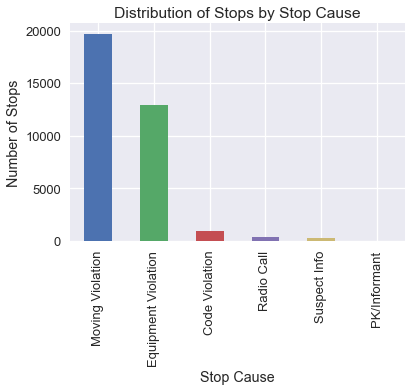

In [184]:
# bar plot stop cause
df['stop_cause'].value_counts().plot(kind='bar');
plt.xlabel("Stop Cause")
plt.ylabel("Number of Stops")
plt.title("Distribution of Stops by Stop Cause")

Here is the distribution of actions outcomes from a traffic stop. As can be seen, a majority of stops result in verbal warnings or citations.

Text(0.5,1,'Distribution of Action Outcomes')

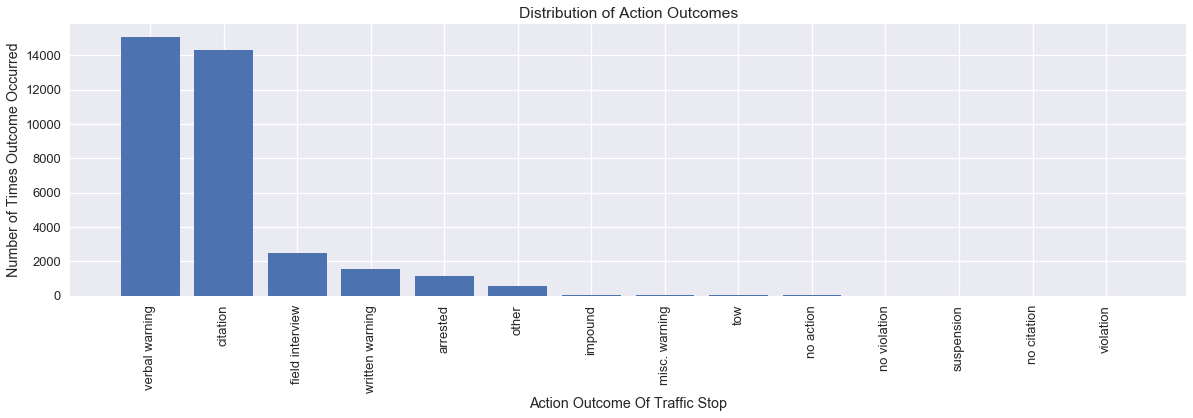

In [185]:
dict_sums = dict(sorted_sums);
fig = plt.figure(figsize=(20,5))
fig = fig.add_subplot(111)
fig.bar(range(len(dict_sums)), list(dict_sums.values()), align='center');
plt.xticks(range(len(dict_sums)), list(dict_sums.keys()), rotation=90);
plt.xlabel("Action Outcome Of Traffic Stop")
plt.ylabel("Number of Times Outcome Occurred")
plt.title("Distribution of Action Outcomes")

We ran the same distribution again but scaled it logarithmically to get a better picture of how all types of traffic stops are represented. 

Text(0.5,1,'Distribution of Action Outcomes Scaled Logarithmically')

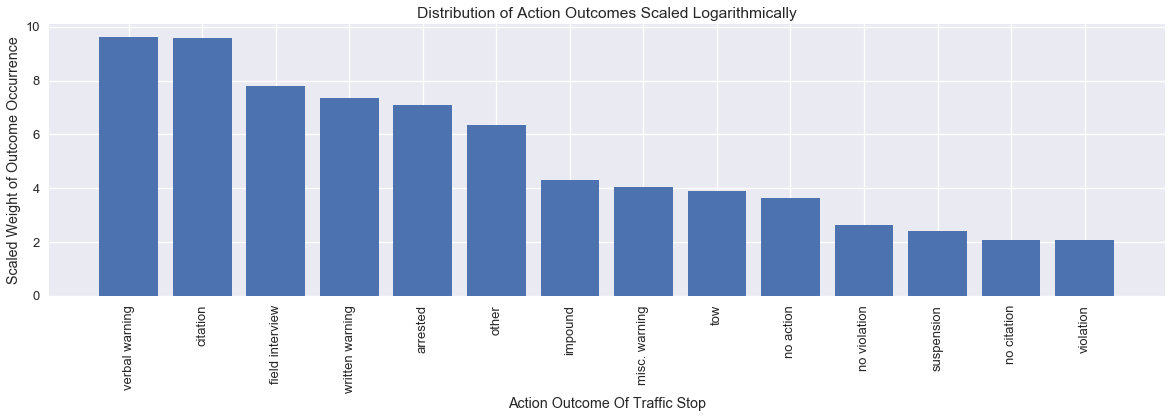

In [186]:
dict_sums_log = {k: np.log(v) for k, v in dict_sums.items()}
fig = plt.figure(figsize=(20,5))
fig = fig.add_subplot(111)
fig.bar(range(len(dict_sums_log)), list(dict_sums_log.values()), align='center');
plt.xticks(range(len(dict_sums_log)), list(dict_sums_log.keys()), rotation=90);
plt.xlabel("Action Outcome Of Traffic Stop")
plt.ylabel("Scaled Weight of Outcome Occurrence")
plt.title("Distribution of Action Outcomes Scaled Logarithmically")

### Analysis - Race

We first looked at how race played a role in the outcomes of the traffice stops. The demographics of San Diego come into play here because when we look at the racial breakdown of the city we can see a disproportionately larger number of White and Hispanic people which is reflected in the bar graph. However, in comparison to the size of the Black population we also see a large raw number of stops for Black individuals. 

Some info on San Diego's demographics are available here.
https://statisticalatlas.com/place/California/San-Diego/Race-and-Ethnicity#figure/race-and-ethnicity

Text(0.5,1,'Distribution of Stops by Subject Race')

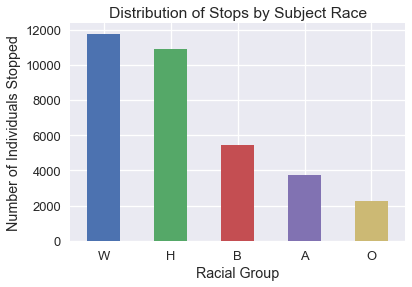

In [187]:
# bar plot by race
df['subject_race'].value_counts().plot(kind='bar', rot=0);
plt.xlabel("Racial Group")
plt.ylabel("Number of Individuals Stopped")
plt.title("Distribution of Stops by Subject Race")

The following graph shows the ratios of actions taken based on race. Only the largest racial groups and action categories with high enough ratios to be discernible are shown for clarity. Looking at each racial group we compared the percentages of each outcome within the racial groups. With this graph, we can compare the ratios of each race and the severity of their outcomes. We noted that a larger percentage of all black people that get pulled over end up getting arrested compared to the percentages of other races. Also looking at the categories it is notable that verbal warnings and citations are the most common across all races however Black and Hispanics have higher percentages for field interviews. This could indicate some racial profiling as further questioning (through a field interview) during a traffic stop could suggest that police officers find Black and Hispanics more suspicious once approached, even if they were originally stopped for a benign reason.

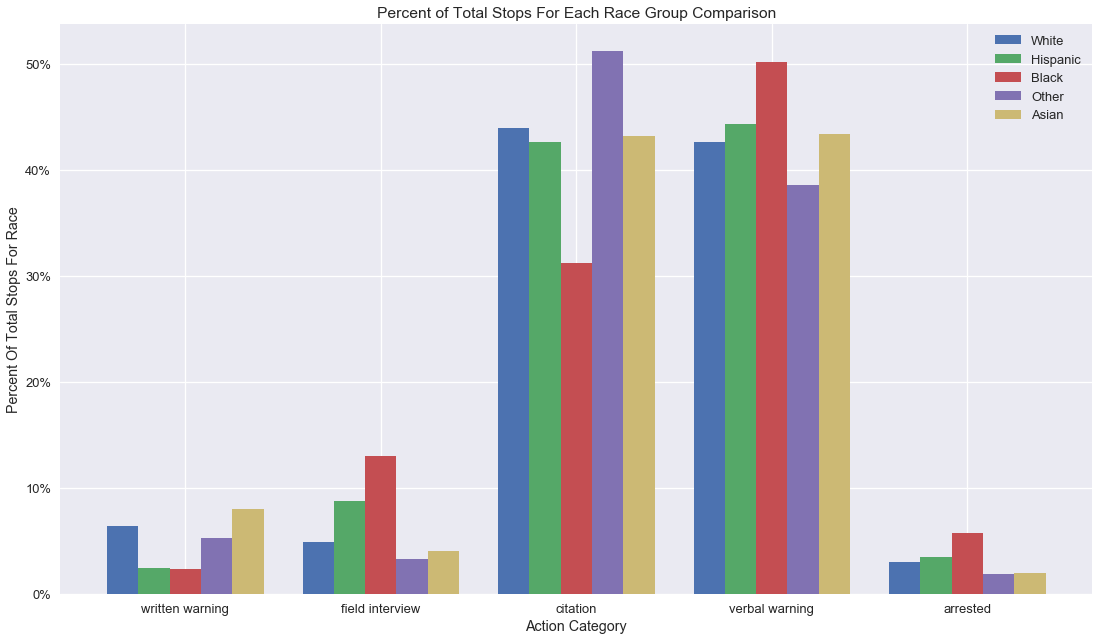

In [188]:
# Plot showing ratios of actions taken based on race
labels = ['written warning', 'field interview', 'citation', 'verbal warning', 'arrested'];
ratio_list = [[ y/descriptive_summary.iloc[x,1] \
               for y in list(descriptive_summary.loc[descriptive_summary.index[x],\
                                                     ['written warning', 'field interview', 'citation', \
                                                      'verbal warning', 'arrested']])] for x in range(17, 22)];
plt.width = 10;

#https://stackoverflow.com/questions/48157735/plot-multiple-bars-for-categorical-data
def subcategorybar(X, vals, width=0.8):
    n = len(vals);
    _X = np.arange(len(X));
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], width=width/float(n), align="edge");  
    plt.xticks(_X, X);

# Create Plot
subcategorybar(labels, ratio_list);
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]); # format y axis to percent
plt.xlabel('Action Category');
plt.ylabel("Percent Of Total Stops For Race");
plt.title("Percent of Total Stops For Each Race Group Comparison")
plt.gca().legend(('White','Hispanic', 'Black', 'Other', 'Asian'))
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()


### Analysis - Age

Next, we looked at the age of drivers that get stopped and we can see a clear distribution with younger drivers acounting for most of the stops and a decline as we go up in age. We also look deeper into how age is related to traffice violations later, in our Statistical Anaylsis.

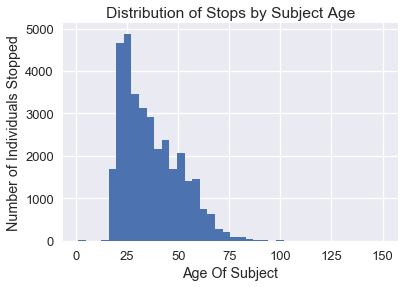

In [189]:
df['subject_age'].plot(kind='hist', bins=40);
plt.xlabel("Age Of Subject")
plt.ylabel("Number of Individuals Stopped")
plt.title("Distribution of Stops by Subject Age")
hist_age = plt.gcf()

The following bar plot shows the mean age and standard devision of subjects based on the actions taken by police in a traffic stop. At first glance, it seems that younger people are more likely be to arrested or have their license suspended, but it's important to note that the distribution of age is heavily weighted towards younger people and the standard deviation is massive. As a first approximation, the plot below might be misleading and requires statistical analysis (done later on).

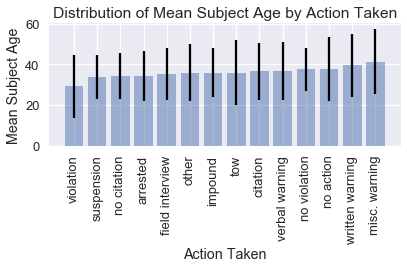

In [190]:
# Plotting mean age by action category
# Select the row to be plotted
first_action_ind = 2
last_action_ind = 16
mean_age = list(descriptive_summary.iloc[11,first_action_ind:last_action_ind]);
stddev_age = list(descriptive_summary.iloc[12,first_action_ind:last_action_ind]);
# create list of tuples tying mean age, standard deviation, and the action category together
zipped_age = zip(mean_age, stddev_age, descriptive_summary.columns[first_action_ind:last_action_ind]); 
zipped_age = sorted(zipped_age, key=lambda x: x[0]) # sort based on mean age
mean_age, stddev_age, labels = zip(*zipped_age);

# create a plot to visualize the mean age and its correlation with the action taken
fig, ax = plt.subplots();
plt.xticks(rotation="vertical")
ax.bar(range(0,len(mean_age)), mean_age, yerr=stddev_age, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Mean Subject Age');
ax.set_xlabel('Action Taken');
ax.set_xticks(range(0,len(mean_age)));
ax.set_xticklabels(labels)
ax.set_title('Distribution of Mean Subject Age by Action Taken')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()


### Analysis - Service Area

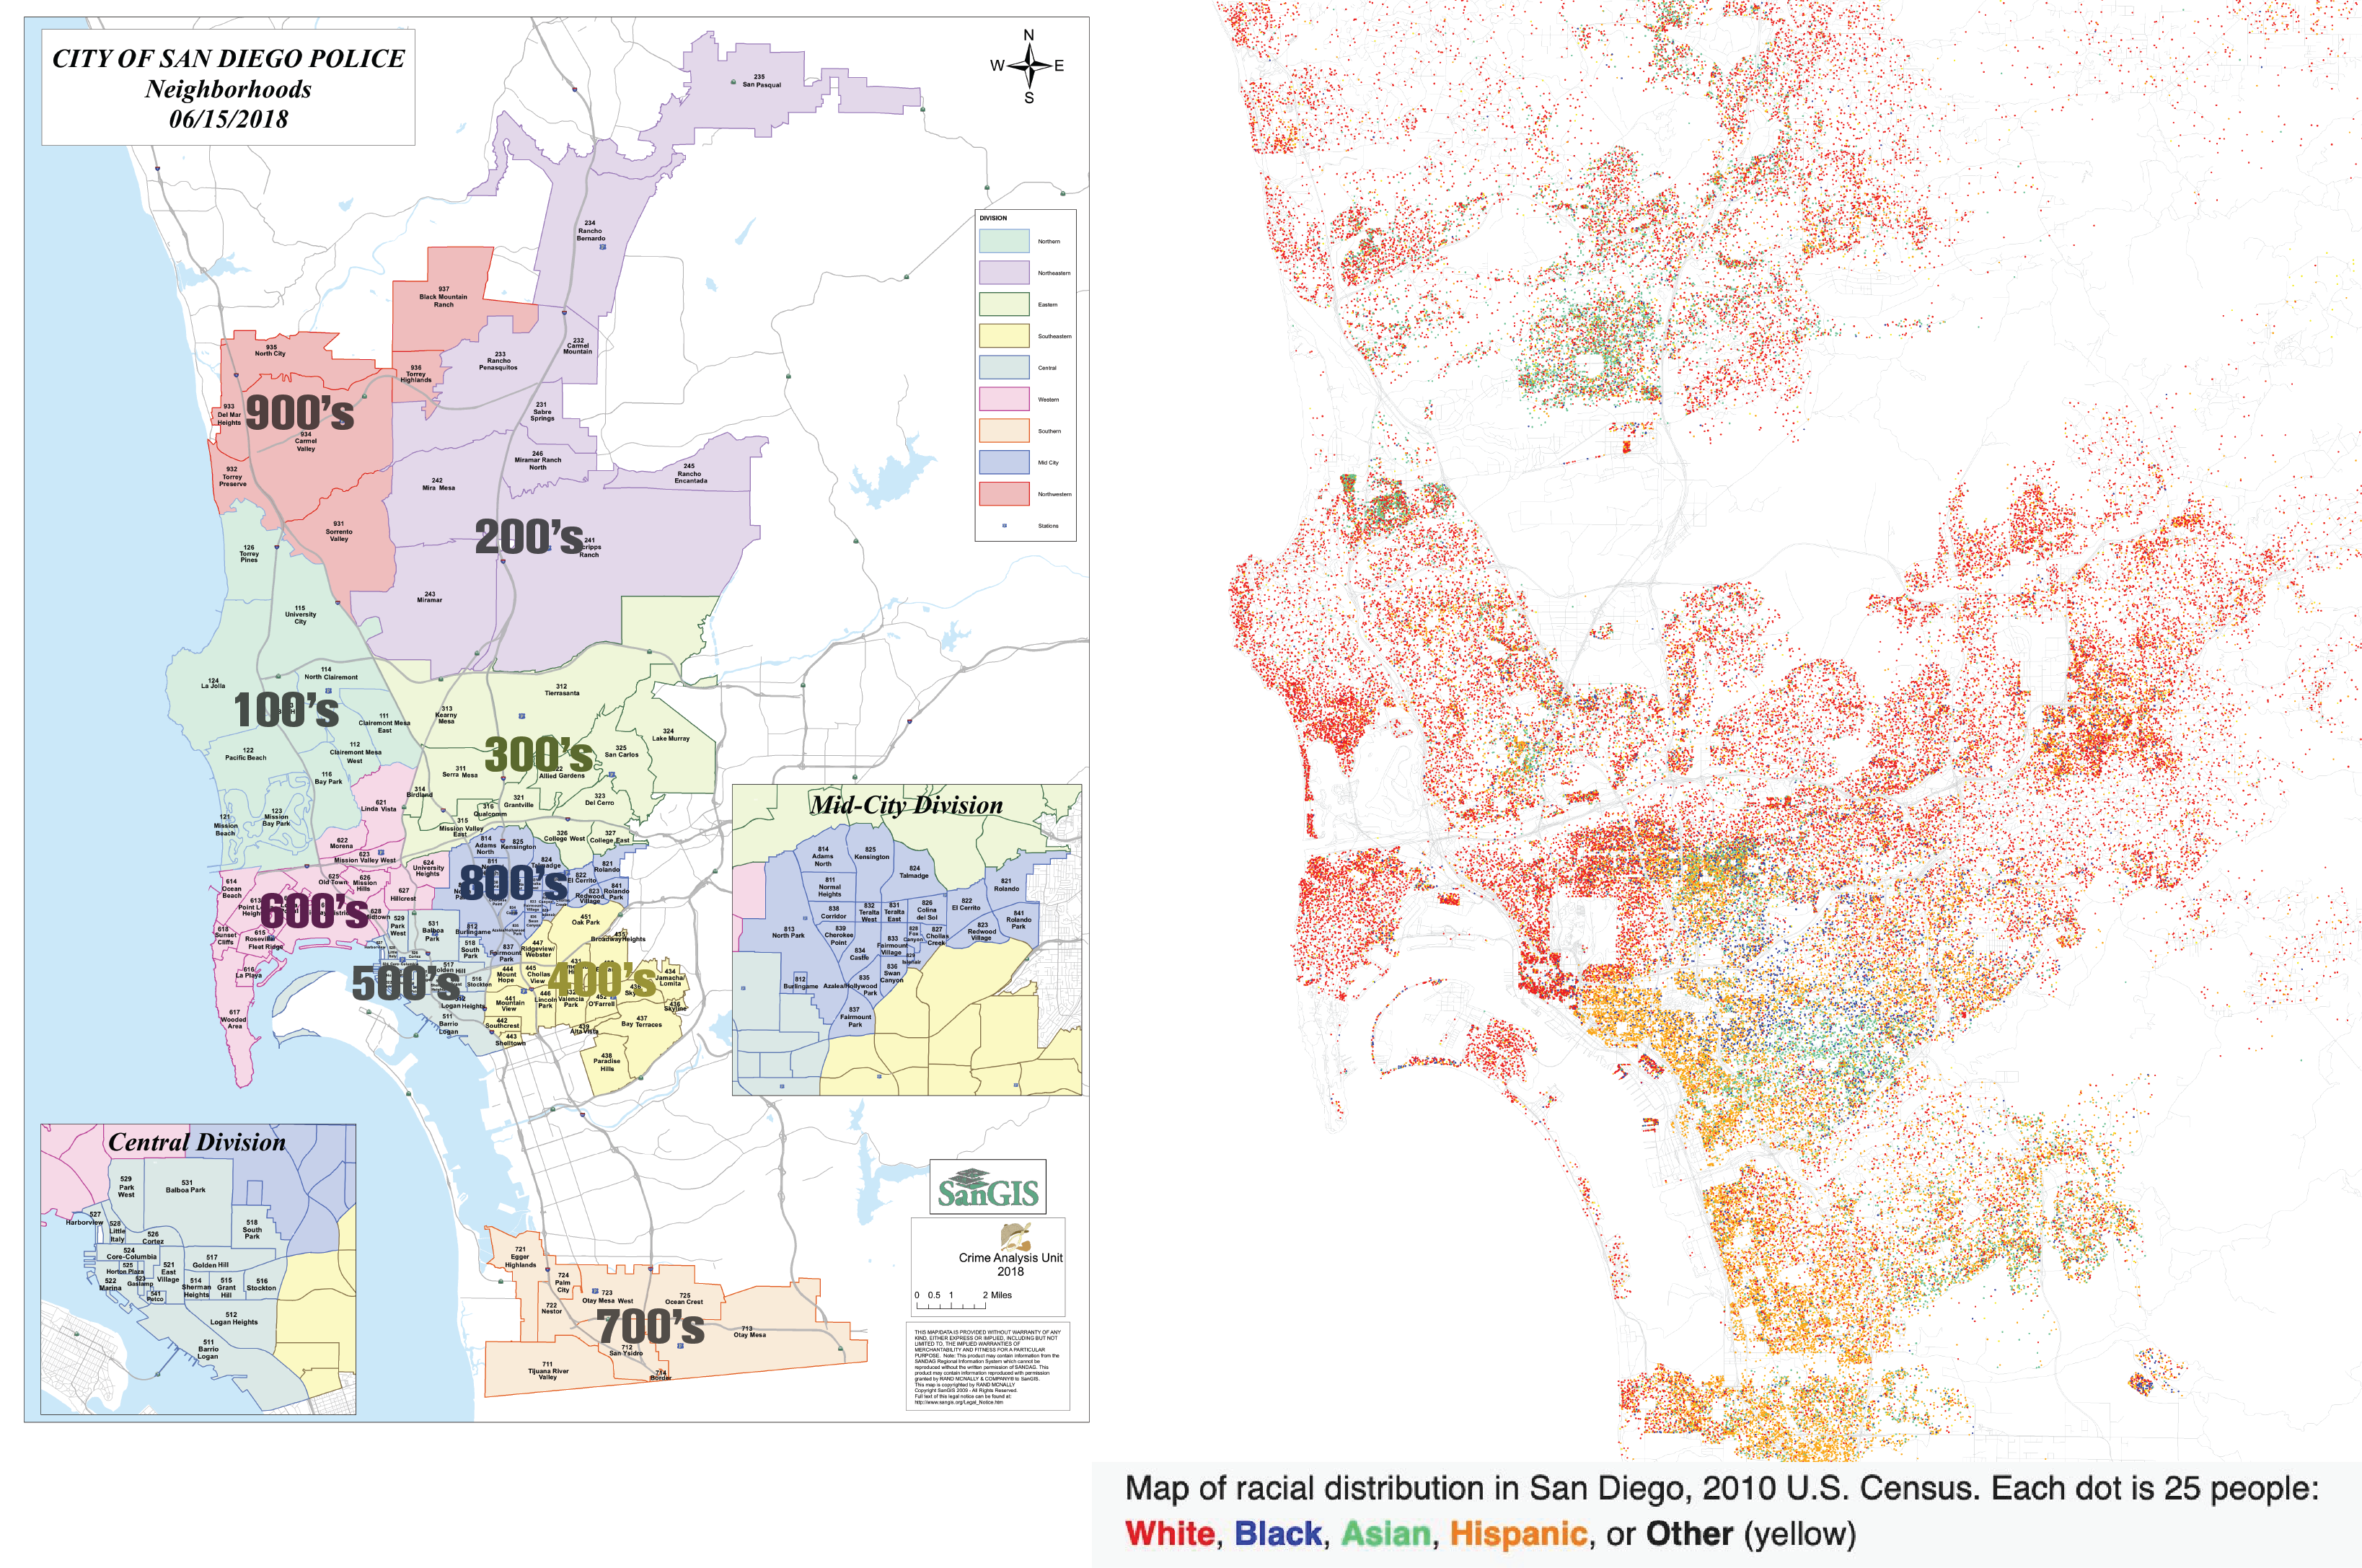

In [191]:
display(Image(filename='Race.png'))

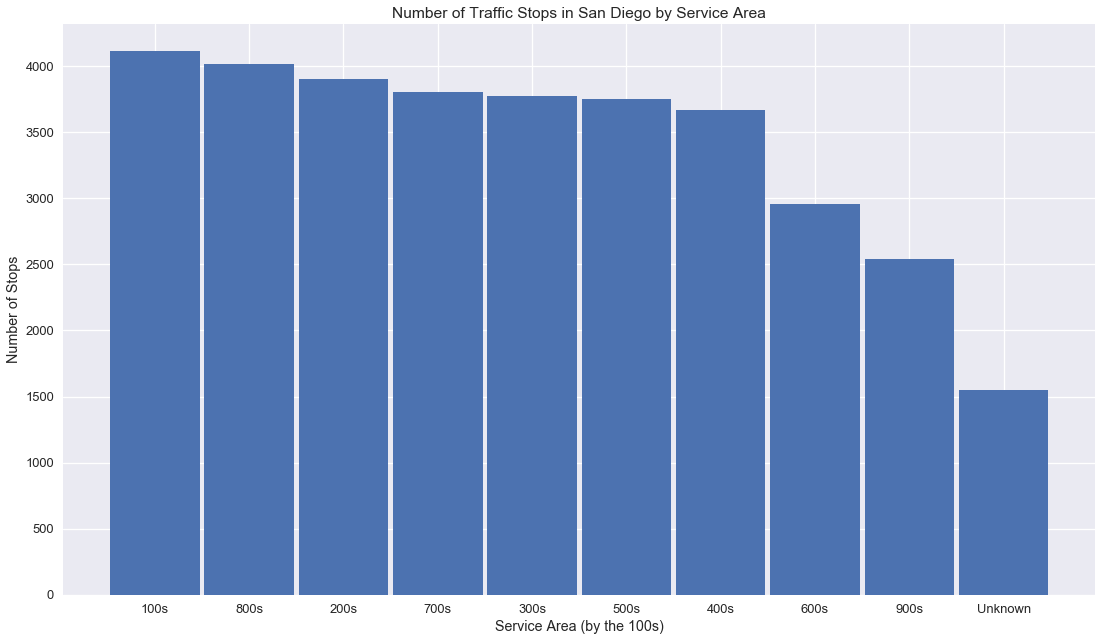

In [192]:
service_dict = {}
greater_areas = set()

for i, entry in df.iterrows():
    #area = entry['service_area']
    greater_area = ((df.loc[i,'service_area'])[:1])
            
    if greater_area not in service_dict:
        service_dict[greater_area] = 1
    else:
        service_dict[greater_area] += 1

#print (service_dict)
new_keys = ['100s','400s','600s','900s','500s','700s','Unknown','300s','800s','200s']
final_dict = dict(zip(new_keys,list(service_dict.values())))
final_dict = dict([(x, final_dict[x]) for x in sorted(final_dict, key=final_dict.get, reverse=True)])
#print(final_dict)
plt.bar(range(len(final_dict)), list(final_dict.values()),width=.95, align='center')
plt.xticks(range(len(final_dict)), list(final_dict.keys()));
plt.xlabel('Service Area (by the 100s)');
plt.ylabel("Number of Stops");
plt.title("Number of Traffic Stops in San Diego by Service Area")
figure = plt.gcf()
figure.set_size_inches(18.5, 10.5)
plt.show()

While there is a generally similar number of stops in each area we did notice a drop off in the 600s and the 900s areas. The 600s correlate to Point Loma and the 900s encompass Sorento Valley and Carmel Valley. Looking at the racial makeup of both of these areas, they have an overwhelming majority of white residents. The high proportion of white drivers and low number of traffic violations in these area supports our hypothesis that race is factor to consider in traffic violation outcomes. However we should also take into acount the types of traffic in each area, for example the 100s service area has a large section of the I-5 highway which could play a part in why it has the largest number of traffic violations. This led us to believe that how residential an area is as well as the demographics of its residents are important factors to consider. 

### Analysis - Time

We were able to graph the raw number stops based on the time that the incident occurred and see a trend in daily times. There are clear peaks and dips in the times that people get stopped with the the highest quantity of stops during 15h (3pm) and 24h (midnight). We think this can be attributed to rush hour traffic and nighttime driving and people could be tired from the long day. 

Text(0.5,1,'Number of Stops by Hour of Day')

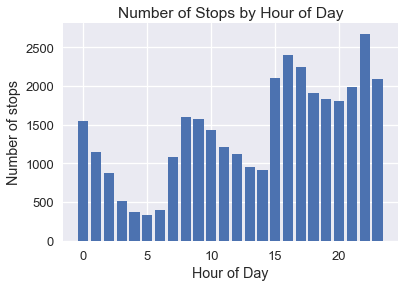

In [193]:
hours = [int(x[x.find(' ')+1:x.find(' ')+3]) for x in df['timestamp']]
hour_counts = {x:0 for x in set(hours)}
for hour in hours:
    hour_counts[hour] += 1
plt.bar(hour_counts.keys(), hour_counts.values());
plt.xlabel('Hour of Day');
plt.ylabel('Number of stops')
plt.title('Number of Stops by Hour of Day')

We broke the data down further and included the racial groups into the graph to check if there was any overlap between the two variables. The colors of the bars seem to stay proportional to each other throughout the day, without any significant increase in traffic violations by a spesific race at a specific time. However, the graph does a good job showing the larger number of Hispanic, White, and Black stops and how they all generally peak and fall at the same times of the day.  

Text(0.5,1,'Number of Stops by Hour of Day With Race Breakdown')

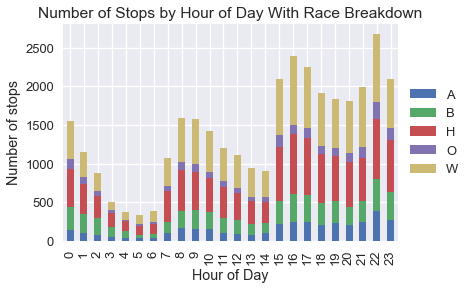

In [194]:
hour_breakdown = {x:[0 for i in range(24)] for x in df['subject_race'].unique()}
for race, hour in zip(df['subject_race'], hours):
    hour_breakdown[race][hour] += 1
hour_breakdown_df = pd.DataFrame(hour_breakdown)
hour_breakdown_df.plot(kind='bar', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Hour of Day');
plt.ylabel('Number of stops')
plt.title('Number of Stops by Hour of Day With Race Breakdown')

<strong>Comparison percentage of total stops by the hour for each race </strong><br>
However, we also looked at the racial percentages of the stops at each hour and while for most of the day the graph is consistent with the raw data above we do see a noticeable switch at around 4 in the morning. The overlap between traffic stops for Black and White drivers is a complete reversal in the general trend for the rest of the day with a significant increase in black stops and a decrease in white ones. While this could be explained by the demographics actually on the road at this time we thought it was a notable statistic relating to the time of day.


In [195]:
hour_breakdown_df['total'] = 0
hour_breakdown_df['H_ratio'] = 0
hour_breakdown_df['W_ratio'] = 0
hour_breakdown_df['B_ratio'] = 0
hour_breakdown_df['O_ratio'] = 0
hour_breakdown_df['A_ratio'] = 0
ratios = [[],[],[],[],[]]
for index, row in hour_breakdown_df.iterrows():
    total = row['H'] + row['W'] + row['B'] + row['O'] + row['A']
    hour_breakdown_df.at[index, 'total'] = total
    ratios[0].append(row['H'] / total)
    ratios[1].append(row['W']/total)
    ratios[2].append(row['B']/total)
    ratios[3].append(row['O']/total)
    ratios[4].append(row['A']/total)

In [196]:
hour_breakdown_df['H_ratio'] = ratios[0]
hour_breakdown_df['W_ratio'] = ratios[1]
hour_breakdown_df['B_ratio'] = ratios[2]
hour_breakdown_df['O_ratio'] = ratios[3]
hour_breakdown_df['A_ratio'] = ratios[4]
hour_breakdown_df.head()

A    B    H    O    W  total   H_ratio   W_ratio   B_ratio   O_ratio  \
0  145  296  491  135  481   1548  0.317183  0.310724  0.191214  0.087209   
1  100  255  384   88  320   1147  0.334786  0.278989  0.222319  0.076722   
2   80  222  280   67  228    877  0.319270  0.259977  0.253136  0.076397   
3   54  128  188   33  109    512  0.367188  0.212891  0.250000  0.064453   
4   40   86  130   21   98    375  0.346667  0.261333  0.229333  0.056000   

    A_ratio  
0  0.093669  
1  0.087184  
2  0.091220  
3  0.105469  
4  0.106667

Text(0.5,1,'Comparison of Percentage of Total Stops By Hour For Each Race')

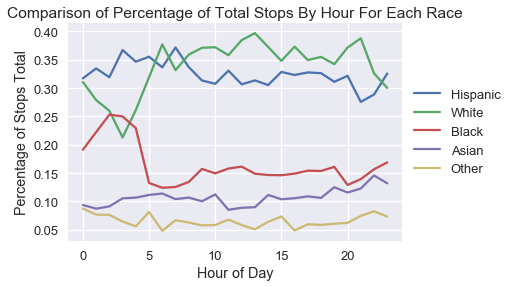

In [197]:
hour_breakdown_df['H_ratio'].plot(label='Hispanic')
hour_breakdown_df['W_ratio'].plot(label='White')
hour_breakdown_df['B_ratio'].plot(label='Black')
hour_breakdown_df['A_ratio'].plot(label='Asian')
hour_breakdown_df['O_ratio'].plot(label='Other')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Hour of Day")
plt.ylabel("Percentage of Stops Total")
plt.title("Comparison of Percentage of Total Stops By Hour For Each Race")

We also looked at the breakdown of stops by month.

Text(0.5,1,'Number of Total Stops By Month')

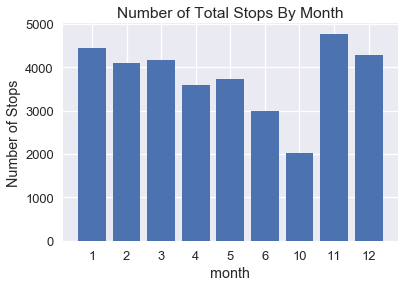

In [198]:
months = [int(x[x.find('-')+1:x.find('-')+3]) for x in df['timestamp']]
month_counts = {x:0 for x in set(months)}
for month in months:
    month_counts[month] += 1
plt.bar(range(len(month_counts)), list(month_counts.values()), align='center')
plt.xlabel('month');
plt.xticks(range(len(month_counts)), list(month_counts.keys()));
plt.ylabel("Number of Stops")
plt.title("Number of Total Stops By Month")

In [199]:
october = []
june = []
for x in df['timestamp']:
    month = int(x[x.find('-')+1:x.find('-')+3])
    if month == 10:
        start = x.find('-')+1
        october.append(int(x[x.find('-', start)+1:x.find('-', start)+3]))
    if month == 6:
        start = x.find('-')+1
        june.append(int(x[x.find('-', start)+1:x.find('-', start)+3]))
print(set(october))
print(set(june))

{17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26}


As we can see, the dips in stops from June and October can be explained by the lack of data for some days of those months. We have no data from before October 17 and no data after June 26 so we can instead look at the average stops per day for the different months:

Text(0.5,1,'Average Number of Daily Stops by Month')

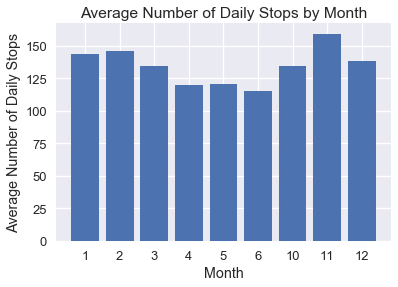

In [200]:
num_days_in_month = {1:31,2:28,3:31,4:30,5:31,6:len(set(june)),10:len(set(october)),11:30,12:31}
avg_stop_per_day = [month_counts[i]/num_days_in_month[i] for i in month_counts]
plt.bar(range(len(month_counts)), avg_stop_per_day);
plt.xticks(range(len(month_counts)), list(month_counts.keys()));
plt.xlabel("Month")
plt.ylabel("Average Number of Daily Stops")
plt.title("Average Number of Daily Stops by Month")

### Analysis - Field Interviews

We believe that “field inteviews” are a clear indicator of suspicion and racial profiling as they are further questioning once the driver has already been stopped. Which is a decision made once the police officer makes after seeing the driver. So, we looked at the raw number for field interviews and we see the same trend. Hispanics and Black people are more likely to be questioned at their car. This is statistically relevant when looking at the racial demographics of San Diego as a whole because there is a significantly larger white population in the area compared to any other race. 

In [201]:
new_ac = [x for x in sorted_actions]
new_ac.append('arrested')
field_interview_subset = df[df['field interview']==1].copy(deep=True)
field_interview_subset_counts = {action : field_interview_subset[action].sum() for action in new_ac}
field_interview_subset_counts.pop('field interview', None)
field_interview_subset.reset_index(inplace=True)

In [202]:
drop_ind = []
for index, row in field_interview_subset.iterrows():
    if sum(list(row)[7:-1]) == 1:
        drop_ind.append(index)
field_interview_subset.drop(drop_ind, axis=0, inplace=True)

In [203]:
field_interview_subset_counts = {y:x for x,y in field_interview_subset_counts.items() if y != 0}

counts_x = field_interview_subset_counts.keys()
counts_y = [field_interview_subset_counts[x] for x in counts_x]
sorted_field_interview_counts = [(y,x) for x,y in sorted(zip(counts_x,counts_y),reverse=True)]
print(sorted_field_interview_counts)

[('verbal warning', 336), ('citation', 91), ('arrested', 42), ('other', 18), ('written warning', 9), ('tow', 3), ('suspension', 1)]


Here we can see the breakdown of actions taken if a field interview was given

Text(0.5,1,'Actions Taken After Field Interview Performed')

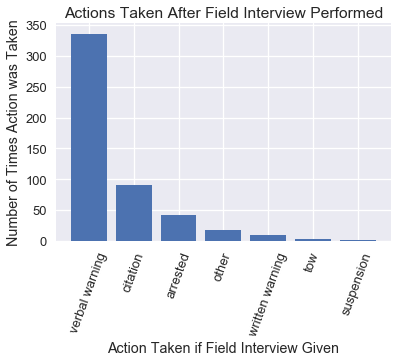

In [204]:
dict_sorted_field_interview_counts = dict(sorted_field_interview_counts)
plt.bar(range(len(dict_sorted_field_interview_counts)), list(dict_sorted_field_interview_counts.values()));
plt.xticks(range(len(dict_sorted_field_interview_counts)), list(dict_sorted_field_interview_counts.keys()), 
           rotation=70);
plt.xlabel("Action Taken if Field Interview Given")
plt.ylabel("Number of Times Action was Taken")
plt.title("Actions Taken After Field Interview Performed")

And the counts per race that were given a field interview

Text(0.5,1,'Number of Field Interview Conducted For Each Race')

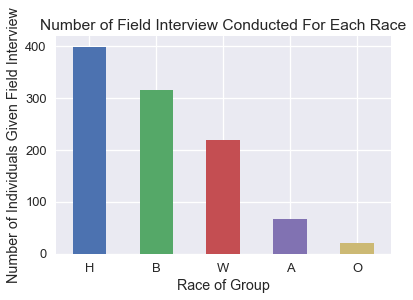

In [205]:
field_interview_subset['subject_race'].value_counts().plot(kind='bar');
plt.xticks(rotation=0);
plt.ylabel("Number of Individuals Given Field Interview")
plt.xlabel("Race of Group")
plt.title("Number of Field Interview Conducted For Each Race")

In [206]:
# Plot showing ratios of actions taken based on race
races = ['W','H', 'B', 'O', 'A']
actions = ['arrested', 'citation', 'written warning', 'verbal warning']
ratios = {race:{action:0 for action in actions} for race in races}
for index, row in field_interview_subset.iterrows():
    for action in actions:
        if row[action] == 1:
            ratios[row['subject_race']][action] += 1
            break
plt.width = 10

In [207]:
total_counts = field_interview_subset['subject_race'].value_counts()
for key,value in ratios.items():
    for key2, value2 in ratios[key].items():
        ratios[key][key2] = (value2 / total_counts[key])

In [208]:
ratios_list = [[ratios[race][action] for race in ratios.keys()] for action in ratios[race].keys()]

Since the number of tows and impounds (3 and 1 respectively) were small, we'll disregard them.  
In the following plot we can see the actions taken in conjunction with a field interview of the driver broken down by race with each subplot showing the percentage of races that were affected by the action.

While there are some cases where a field interview was the final outcome, there was a signifigant number of final outcomes that also included an interview. Looking at this set we can clearly see how Hispanic and Black drivers that were stopped and talked to ended up with more severe outcomes. This could be an indicator of racial discrimination as we can clearly see that there is a racial bias across the board for nonwhite individuals that got interviewed and harsher results.


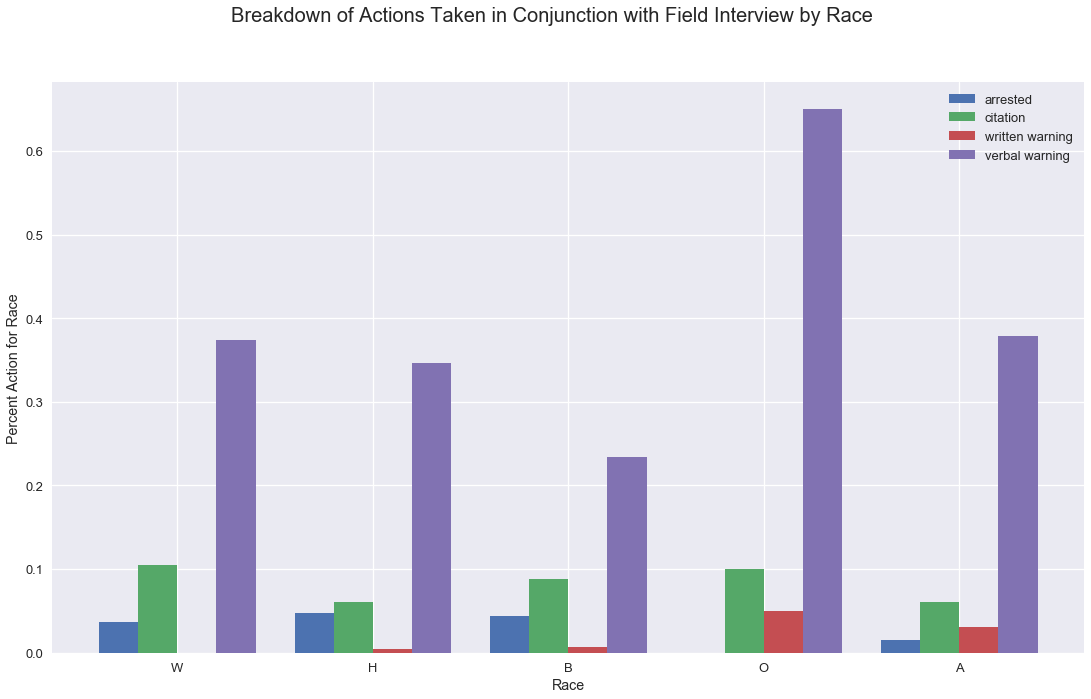

In [209]:
# Create Plot
fig, ax = plt.subplots();
subcategorybar(races, ratios_list)
fig.suptitle('Breakdown of Actions Taken in Conjunction with Field Interview by Race', fontsize=20)
plt.xlabel('Race')
plt.ylabel("Percent Action for Race")
plt.gca().legend(actions)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

In [210]:
cont_table = pd.DataFrame()
cont_table['race'] = ['W','H','B','O','A']
cont_table['arrested'] = 0
cont_table['written warning'] = 0
cont_table['citation'] = 0
cont_table['verbal warning'] = 0
cont_table.set_index('race', inplace=True)
for index, row in cont_table.iterrows():
    for key in row.keys():
        cont_table.at[index, key] = (field_interview_subset.loc[(field_interview_subset['subject_race']==index) \
                                                                & (field_interview_subset[key]==1)]).shape[0]

Now we will perform chi-squared tests to compare the distributions of arrests, written warnings, citations, and verbal warnings when a field interview was conducted vs when a field interview was not conducted among different races 

In [211]:
cont_table_analysis = pd.DataFrame()
cont_table_analysis['race'] = cont_table.index
cont_table_analysis.set_index('race', inplace=True)
cont_table_expected = {x+' (E)':[] for x in cont_table.columns}

for category in cont_table.columns:
    cont_table_analysis['field interview'] = cont_table[category]
    actual = list(descriptive_summary.iloc[17:22][category])
    actual = [x - y for x,y in zip(actual, cont_table[category])]
    cont_table_analysis['no field interview'] = actual
    fi_stat, fi_p, fi_dof, fi_expected = chi2_contingency(cont_table_analysis)
    cont_table_expected[category+' (E)'] = [x[0] for x in fi_expected]
    print('p-value for ' + category + ': ' + str(fi_p))

p-value for arrested: 0.11576316850165372
p-value for written warning: 0.000736079953048773
p-value for citation: 5.8752086964763215e-09
p-value for verbal warning: 1.3237445647919973e-05


In [212]:
expected_cont_table = pd.DataFrame(cont_table_expected)
expected_cont_table.set_index(cont_table.index, inplace=True)
merged_cont_table = pd.merge(cont_table,expected_cont_table,left_index=True,right_index=True)
merged_cont_table

arrested  written warning  citation  verbal warning  arrested (E)  \
race                                                                      
W            8                0        25              82     12.920339   
H           19                2        30             139     13.738983   
B           14                4        30              77     11.176271   
O            0                1         2              13      1.530508   
A            1                2         4              25      2.633898   

      citation (E)  verbal warning (E)  written warning (E)  
race                                                         
W        32.955965          112.029738             4.323641  
H        29.553976          107.613674             1.536030  
B        10.792075           60.642814             0.739570  
O         7.351862           19.359310             0.676991  
A        10.346122           36.354464             1.723767

When computing the chi-squared statistic for the action categories of arrested, written warning, citation, and verbal warnings based on the race counts for field interview vs no field interview, we get highly significant p-values for written warning, citation, and verbal warning while we get not signifiant p-value for arrested. When using the chi-squared statistic we have the following null:  
H0: There is no association between race and the action taken with or without a field interview   
H1: There is an association  
So we find that:  
1. We do not reject the null for arrests and so there is no association between race and arrests with or without field interviews 
2. We reject the null for written warnings, citations, and verbal warnings, and so there is an association between race and written warning, citation, and verbal warning  with or without field interviews  

## Statistical Analysis

Since our data set is categorical, we need to perform a chi square test to determine if there is a significant difference between the relation of race and outcome of police stop.

First, we need to extract the rows with races and drop outcomes that we don't want

In [213]:
# Get all the row with races
race_table = descriptive_summary.iloc[17:22]

# Drop all violations except citation, verbal warning, written warning, field interview
race_table = race_table[["Characteristic", "citation", "verbal warning", "written warning", "field interview", 
                         "arrested"]]

race_table.head()

Characteristic citation verbal warning written warning field interview  \
17          White     5173           5023             760             580   
18       Hispanic     4639           4825             270             959   
19          Black     1694           2719             130             708   
20          Other     1154            868             119              76   
21          Asian     1624           1630             303             152   

   arrested  
17      363  
18      386  
19      314  
20       43  
21       74

We can then transform this dataframe into a contingency table and perform a chi square test

In [214]:
race_table.reset_index().values
race_table.set_index("Characteristic", inplace=True)

print("Observed values:")
print(race_table)

# Perform the chi square test
stat, p, dof, expected = chi2_contingency(race_table)

print("\nDegrees of Freedom =", dof)
print("\nStatistic =", stat)
print("\np value=",p)

print("\nExpected values:")
print(expected)

Observed values:
               citation verbal warning written warning field interview  \
Characteristic                                                           
White              5173           5023             760             580   
Hispanic           4639           4825             270             959   
Black              1694           2719             130             708   
Other              1154            868             119              76   
Asian              1624           1630             303             152   

               arrested  
Characteristic           
White               363  
Hispanic            386  
Black               314  
Other                43  
Asian                74  

Degrees of Freedom = 16

Statistic = 1224.1243994381034

p value= 9.8830209534665e-251

Expected values:
[[4914.28080726 5182.97678251  544.27276933  851.50133002  405.96831088]
 [4575.62123403 4825.8004684   506.76510727  792.82151738  377.99167293]
 [2298.34210374 2424.00754641 

After printing all the values that we get from the chi square test, we want to interpret those values to understand if there is a significance in our data and whether to accept or reject our null hypothesis.

Our null hypothesis assumes that there is no significant difference between the observed and expected frequencies of our variable.

We interpret our test statistics using a probability value of 95%.

In [215]:
# interpret test-statistic
probability = 0.95
critical = chi2.ppf(probability, dof)

print("Probability =", probability, ", Critical = ", critical, ", Statistic", stat)

if abs(stat) >= critical:
    print("\nThere is a significant result, we reject the null hypothesis")
else:
    print("\nThere is no significant result, we accept the nul hypothesis")
    

Probability = 0.95 , Critical =  26.296227604864235 , Statistic 1224.1243994381034

There is a significant result, we reject the null hypothesis


We can do the same thing to interpret the p value

In [216]:
# interpret p-value
alpha = 1.0 - probability
print("Significance=", alpha, ", p value =", p)

if p <= alpha:
    print("\nThere is a significant result, we reject the null hypothesis")
else:
    print("\nThere is no significant result, we accept the nul hypothesis")

Significance= 0.050000000000000044 , p value = 9.8830209534665e-251

There is a significant result, we reject the null hypothesis


Since both the test-statistic and the p value reject the null hypothesis, there is in fact a significant difference between the observed and expected values, we can then compare the 2 values and interpret their meaning.

In [217]:
print("Observed values:")
print(race_table)

race_table_expected = pd.DataFrame(expected, columns=list('abcde'))
race_table_expected.rename(index=str, columns={"a": "citation", "b": "verbal warning", "c": "written warning", 
                                               "d": "field interview", "e": "arrested"}, inplace=True)
race_table_expected["Characteristic"] = ["White", "Hispanic", "Black", "Other", "Asian"]
race_table_expected.set_index("Characteristic", inplace=True)

print("\nExpected values:")
print(race_table_expected)

Observed values:
               citation verbal warning written warning field interview  \
Characteristic                                                           
White              5173           5023             760             580   
Hispanic           4639           4825             270             959   
Black              1694           2719             130             708   
Other              1154            868             119              76   
Asian              1624           1630             303             152   

               arrested  
Characteristic           
White               363  
Hispanic            386  
Black               314  
Other                43  
Asian                74  

Expected values:
                   citation  verbal warning  written warning  field interview  \
Characteristic                                                                  
White           4914.280807     5182.976783       544.272769       851.501330   
Hispanic        4575.

We can see that there is some differences between the expected and observed output. Now we want to know the severity of difference between the two values. We can then find the difference in percentage change by applying the formula (expected-observed)/observed.

In [218]:
race_percentage = race_table.copy()

for column in race_table.columns:
    race_percentage[column] = (race_table_expected[column] - race_table[column]) * 100 / race_table[column]
    race_percentage[column] = race_percentage[column].apply(lambda x: round(x, 2)) 

race_percentage

citation  verbal warning  written warning  field interview  \
Characteristic                                                               
White              -5.00            3.18           -28.39            46.81   
Hispanic           -1.37            0.02            87.69           -17.33   
Black              35.68          -10.85            95.81           -43.75   
Other             -19.12           13.41           -13.13           112.80   
Asian              -3.79            1.09           -42.89            78.10   

                arrested  
Characteristic            
White              11.84  
Hispanic           -2.07  
Black             -39.53  
Other              79.32  
Asian              74.42

For the white race group, our values of citation and verbal warning did not change too much with a deviation of <5% while written warning are lower by 28.2% and field interviews are higher by 47%, they are also 12.2% more likely to be arrested.

Hispanics did not see much difference in citation, verbal warning, or arrested numbers, but the number of written warning increased by 86.7% and field interview decreased by 17.4%.

Blacks on the other hand has the most deviation on all the stop outcomes. The expected values for verbal warning, field interview, and arrested decreased by 10.9%, 43.9%, and 39.6% respectively. But the number of citation increased by 35.9% and written warning by 95.3%.

Asians did not see much change on citation and verbal warning, but they are more likely to get field interview and arrested by 77.8% and 74.1%, and less likely to get written warning by 42.7%.

Lastly, the other race demographics have huge deviations on field interview and arrested with the values increasing by 113.9% and 80.3%.

We can see from the expected outcomes that only blacks are more likely to get citation, while all other races are actually less likely to get one. Not only that, Hispanics and black are the only 2 races that are more likely to get a written warning as well as less chance to be given a field interview. Looking at these numbers mean that there is a possible bias among these races.

We can perform the same chi square test for age groups

In [219]:
# Get all the row with ages
age_table = descriptive_summary.iloc[2:11]

# Drop all violations except citation, verbal warning, written warning, field interview
age_table = age_table[["Characteristic", "citation", "verbal warning", "written warning", "field interview", 
                       "arrested"]]

age_table.head(9)

Characteristic citation verbal warning written warning field interview  \
2        10-19 yr      774            700              92             129   
3        20-29 yr     4812           5057             422             904   
4        30-39 yr     3397           3584             324             614   
5        40-49 yr     2365           2542             303             405   
6        50-59 yr     1830           1934             257             286   
7        60-69 yr      852            909             127             118   
8        70-79 yr      199            240              44              16   
9        80-89 yr       44             81              10               2   
10          ≥90yr        7             15               3               1   

   arrested  
2        53  
3       461  
4       301  
5       185  
6       137  
7        34  
8         7  
9         0  
10        2

We can then transform this dataframe into a contingency table and perform a chi square test

In [220]:
age_table.reset_index().values
age_table.set_index("Characteristic", inplace=True)

print("Observed values:")
print(age_table)

# Perform the chi square test
stat, p, dof, expected = chi2_contingency(age_table)

print("\nDegrees of Freedom =", dof)
print("\nStatistic =", stat)
print("\np value=",p)

print("\nExpected values:")
print(expected)

Observed values:
               citation verbal warning written warning field interview  \
Characteristic                                                           
10-19 yr            774            700              92             129   
20-29 yr           4812           5057             422             904   
30-39 yr           3397           3584             324             614   
40-49 yr           2365           2542             303             405   
50-59 yr           1830           1934             257             286   
60-69 yr            852            909             127             118   
70-79 yr            199            240              44              16   
80-89 yr             44             81              10               2   
≥90yr                 7             15               3               1   

               arrested  
Characteristic           
10-19 yr             53  
20-29 yr            461  
30-39 yr            301  
40-49 yr            185  
50-59 yr    

We interpret both test-statistic and p-value for the age table

In [221]:
# interpret test-statistic
probability = 0.95
critical = chi2.ppf(probability, dof)

print("Probability =", probability, ", Critical = ", critical, ", Statistic", stat)

if abs(stat) >= critical:
    print("\nThere is a significant result, we reject the null hypothesis")
else:
    print("\nThere is no significant result, we accept the nul hypothesis")
    

Probability = 0.95 , Critical =  46.19425952027846 , Statistic 190.77771648791153

There is a significant result, we reject the null hypothesis


In [222]:
# interpret p-value
alpha = 1.0 - probability
print("Significance=", alpha, ", p value =", p)

if p <= alpha:
    print("\nThere is a significant result, we reject the null hypothesis")
else:
    print("\nThere is no significant result, we accept the nul hypothesis")

Significance= 0.050000000000000044 , p value = 1.6689126663896327e-24

There is a significant result, we reject the null hypothesis


Since both the test-statistic and the p value reject the null hypothesis, there is in fact a significant difference between the observed and expected values, we can then compare the 2 values and interpret their meaning.

In [223]:
print("Observed values:")
print(age_table)

age_table_expected = pd.DataFrame(expected, columns=list('abcde'))
age_table_expected.rename(index=str, columns={"a": "citation", "b": "verbal warning", "c": "written warning", 
                                              "d": "field interview", "e": "arrested"}, inplace=True)
age_table_expected["Characteristic"] = ["10-19 yr", "20-29 yr", "30-39 yr", "40-49 yr", "50-59 yr", 
                                        "60-69 yr", "70-79 yr", "80-89 yr", "≥90yr"]
age_table_expected.set_index("Characteristic", inplace=True)

print("\nExpected values:")
print(age_table_expected)

Observed values:
               citation verbal warning written warning field interview  \
Characteristic                                                           
10-19 yr            774            700              92             129   
20-29 yr           4812           5057             422             904   
30-39 yr           3397           3584             324             614   
40-49 yr           2365           2542             303             405   
50-59 yr           1830           1934             257             286   
60-69 yr            852            909             127             118   
70-79 yr            199            240              44              16   
80-89 yr             44             81              10               2   
≥90yr                 7             15               3               1   

               arrested  
Characteristic           
10-19 yr             53  
20-29 yr            461  
30-39 yr            301  
40-49 yr            185  
50-59 yr    

In [224]:
age_percentage = age_table.copy()

for column in age_table.columns:
    age_table[column] = age_table[column].apply(lambda x: max(x, 1))
    age_percentage[column] = (age_table_expected[column] - age_table[column]) * 100 / age_table[column]
    age_percentage[column] = age_percentage[column].apply(lambda x: round(x, 2)) 

age_percentage

citation  verbal warning  written warning  field interview  \
Characteristic                                                               
10-19 yr           -6.74            8.77           -13.07            -3.01   
20-29 yr            0.03            0.40            26.37            -7.71   
30-39 yr           -0.07           -0.10            16.07            -4.18   
40-49 yr            1.28           -0.61           -12.43             2.50   
50-59 yr            0.29            0.09           -20.89            11.22   
60-69 yr           -1.12           -2.25           -26.51            23.74   
70-79 yr            5.01           -8.16           -47.39           126.36   
80-89 yr           28.58          -26.33           -37.32           390.29   
≥90yr              65.19          -18.69           -57.30           100.41   

                arrested  
Characteristic            
10-19 yr           12.55  
20-29 yr          -13.72  
30-39 yr           -6.81  
40-49 yr            6.99  
50-59 yr           10.69  
60-69 yr          104.75  
70-79 yr          146.67  
80-89 yr          367.51  
≥90yr             -52.23

Since our population sample are mostly on 20-29 years to 50-59 years age groups, we want to focus our analysis on those age groups.

We can see that the 20-29 year age groups see no difference in the citation and verbal warning numbers, while their written warning is higher by 26.4%. The field interview and arrested number however are lower by 7.7% and 13.7% respectively.

The same can be said with the 30-39 year age group where no difference is found in the citation and verbal warning numbers, but they are more likely to get written  warning by 16% and less likely to get field interview and arrested by 4.2% and 6.8%.

The 40-49 year group also did not see any significant difference in citation or verbal warning numbers, but they are less likely to get written warning by 12.4%, and more likely to get field interview and arrested by 2.5% and 7%.

50-59 year old group share similarities with 40-49 year group where the expected number of written warning decreased by 20.9%, but field interview and arrested numbers increased by 11.2% and 10.7% respectively.

In conclusion, we see that younger age groups are more likely to get written warnings and less of a field interview or arrested as reflected in the 20-29 years and 30-39 years group, while older groups of 40-49 years and 50-59 years are less likely to get written warnings and more likely to get field interview and arrested.

Lastly, for the age groups that we observed, there is no significant difference in both citation and verbal warning numbers between the observed and expected values.

# Ethics and Privacy

The following points on ethics and privacy follow the deon checklist. http://deon.drivendata.org/

### Data Collection

Informed Consent: The data set we are using involves human subjects. In this case, San Diego's Police department has explicitly made this data set publically available, but the subjects whom this data describes are not aware of this data being used in this study.

Collection Bias: We acknowledge that the data we are using may be biased, however we are unable to mitigate said bias. We can only perform our interpretations with this in mind.

Limit Personally Identifiable Information Exposure: The data set used in our analysis does not contain personally identifiable information classified by NIST, however it does contain potentially PII, like gender, race, and age. Although, we believe it will be difficult to identify individuals with this information. We do acknowledge that this becomes less true the older an individual is.

### Data Storage

Data Security: All the data used in our study is publically available. As such, we have no plans to protect or secure said data.

Right to be forgotten: Our data does not specify individuals. If an individual is able to find their record in the dataset, we would be able to remove their record from this study, but not the public data set.

Data Retention Plan: We do not plan to delete this data or study.

### Analysis

Missing Perspectives: We have not engaged with subjects involved with the dataset to address potential blindspots.

Dataset Bias: We have not taken steps to mitigate or address bias within the dataset, but have kept in mind that the data may have bias in our analysis.

Honest Representation: Our visualizations, summary statistics, and reports have all be designed with the goal of transparency and honesty. We have made great effort to ensure we are not selectively showing analysis that fits any particular agenda or to conform to our assumptions.

Privacy in Analysis: We find the data we have shown in our study to be necessary for our analysis. We have not shown any strictly personally identifiable information.

Auditability: The process of generating our analysis is completely transparent in this document and can be reproduced.

### Modeling

Note that some points on modeling have been omitted because they do not apply to our particular study/method.

Proxy Discrimination: We have made sure to not rely on variables or proxies for variables that are unfairly discriminatory.

Communicate bias: Have we communicated the shortcomings, limitations, and biases of the model to relevant stakeholders in ways that can be generally understood.

### Deployment

Redress: We have discussed a plan for response if people are harmed by the results.

Rollback: We would be able to remove this study if necessary. 

Unintended Use: We are aware the results of our study can be taken out of context or used inappropriately.

The analysis could potentially be used against certain groups or even against San Diego’s Police department, and can be taken out of context. For example, “Focus: How San Diego’s police traffic stop study stacks up with research in other cities,” by the San Diego Union Tribune, is an article on the study described in the “background” section of the proposal. In their article, they focus on the racial aspects of the study and acknowledge that there exists statistical racial disparity in 2014, but they do not mention that no disparity was found in 2015. Elements of analysis can be taken out of context and even if bias is avoided in our own study, that does not mean bias cannot be made. 

In addition, we must be wary of missing data and the faithfulness of our dataset. We will be transparent in our analysis and how we clean and select what data we will use, but we also have a responsibility of judging whether or not the source of our data is something that can be trusted in the first place

Other concerns include ownership of the data and privacy. The dataset is made publically available for viewing and use by the city of San Diego and it does not identify individuals or share personal details.

The data set is under the "ODC Public Domain Dedication and License"
<br>https://opendatacommons.org/licenses/pddl/summary/

<strong>We are free:</strong>
<ul>
<li>To Share: To copy, distribute and use the database.
<li>To Create: To produce works from the database.
<li>To Adapt: To modify, transform and build upon the database.
</ul>

The PDDL imposes no restrictions on our use of the PDDL licensed database.

# Conclusion and Discussion

Our data shows that a both race and age does play a role in determining the outcome of a traffic stop.

We hypothesized that race plays a factor in the outcome severity of a traffic stop in that non-White individuals are more likely to receive a harsher outcome. From our analysis, we found that this is not strictly true and that the results are more nuanced than expected.

Some of our findings are inline with our hypothesis that non-White groups receive a harsher punishment when compared to the White group. When compared to the White race group, we found that Blacks are more likely to receive a citation, Hispanic and Black people are more likely to receive written warnings compared to White people, and Asians and "Other" are more likely to get arrested compared to Whites. 

However, there are also cases where non-White groups are less likely to receive more severe outcomes. For example, Blacks and Hispanics are actually less likely to get arrested and field interviewed compared to Whites. The "Other" race group is also less likely to receive citations, while the citation rate for Asians and Hispanics does not significantly differ from Whites.

Since the analysis we found shows both cases of non-White groups receiving more severe outcomes and less severe outcomes, we can say that our hypothesis is not strictly true, which means that there exists a bias that is unique within its own race group, which requires looking more deeply at each race group on how these bias can affect the outcome of a traffic stop.

We also hypothesized that age affects the outcome of traffic stop in that younger and older drivers are more likely to receive warnings and those in between are more likely to receive citations.

We found that our hypothesis is only partially correct. From our analysis, we found that younger driver are more likely to receive written warnings, which is in line with our hypothesis, but the same cannot be said for older age groups. We found that as you grow older, you are less likely to get written warnings and are more likely to get field interviewed and arrested. We see no tendency that older people are more likely to get written warnings. Therefore, our hypothesis is only true for younger individuals, but incorrect for older people as the severity of outcome will only increase as you get older.

While the data we found supports our hypothesis that the severity of violation outcomes is affected by the driver's identity, we also have to take into account that we cannot accurately determine the reason for each stop. A “moving violation” could be given for any number of reasons; for example, a moving violation might be given running a traffic light, conducting a hit and run, or speeding. Therefore we can not pinpoint if the reason behind a more severe outcome was due to the individual's race or because the “violation” was actually more severe. While we were able to make some assumptions when comparing races against each other with our chi-squared test, just looking at the numbers alone we cannot tell which of these reasons is the actual result. 


__Limitations__

As mentioned above, due to the lack of granularity in the availability of data, especially in causes of violation, it is not possible to determine if the outcome of police stop is actually due to the severity of the violation or the identity and age of the individual.

Additionally, the identity of an individual in the context of the data available to us does not include their past record of infractions.

Not only that, since the number of data on certain races are small, we categorized them into the others race groups. The same problem occured with age with limited data on older individuals. This lack of data and lack of proper categorization for other races might cause the result of our analysis to be skewed.